訓練模型

In [104]:
import pandas as pd
import numpy as np

source_df = pd.read_csv(f"..//Data//PreparedData//L1_Processed_Train.csv")
print(source_df.dtypes)
source_df

Year                     int64
Month                    int64
Day                      int64
Hour                     int64
Minute                   int64
Avg_WindSpeed(m/s)     float64
Avg_Pressure(hpa)      float64
Avg_Temperature(°C)    float64
Avg_Humidity(%)        float64
Avg_Sunlight(Lux)      float64
Avg_Power(mW)          float64
Max_WindSpeed(m/s)     float64
Max_Pressure(hpa)      float64
Max_Temperature(°C)    float64
Max_Humidity(%)        float64
Max_Sunlight(Lux)      float64
Max_Power(mW)          float64
Min_WindSpeed(m/s)     float64
Min_Pressure(hpa)      float64
Min_Temperature(°C)    float64
Min_Humidity(%)        float64
Min_Sunlight(Lux)      float64
Min_Power(mW)          float64
dtype: object


,Year,Month,Day,Hour,Minute,Avg_WindSpeed(m/s),Avg_Pressure(hpa),Avg_Temperature(°C),Avg_Humidity(%),Avg_Sunlight(Lux),...,Max_Temperature(°C),Max_Humidity(%),Max_Sunlight(Lux),Max_Power(mW),Min_WindSpeed(m/s),Min_Pressure(hpa),Min_Temperature(°C),Min_Humidity(%),Min_Sunlight(Lux),Min_Power(mW)
0,2024,1,1,6,30,0.0,1016.54,17.50,86.78,50.09,...,17.5,86.9,86.67,0.01,0.0,1016.50,17.5,86.7,25.00,0.00
1,2024,1,1,6,40,0.0,1016.59,17.49,86.80,163.25,...,17.5,86.9,235.00,0.03,0.0,1016.51,17.4,86.7,100.83,0.00
2,2024,1,1,6,50,0.0,1016.66,17.50,86.95,326.83,...,17.5,87.1,400.00,0.07,0.0,1016.63,17.5,86.9,251.67,0.03
3,2024,1,1,7,0,0.0,1016.73,17.50,86.99,470.83,...,17.5,87.0,537.50,0.10,0.0,1016.69,17.5,86.9,415.83,0.07
4,2024,1,1,7,10,0.0,1016.77,17.57,86.97,659.67,...,17.6,87.2,784.17,0.19,0.0,1016.72,17.5,86.5,570.83,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,2024,7,24,17,40,0.0,961.30,25.22,100.00,91.25,...,25.3,100.0,114.17,0.01,0.0,960.69,25.1,100.0,50.00,0.00
10621,2024,7,24,17,50,0.0,961.06,24.91,100.00,54.00,...,25.1,100.0,80.00,0.00,0.0,960.63,24.8,100.0,45.00,0.00
10622,2024,7,24,18,0,0.0,960.91,24.76,100.00,37.25,...,24.8,100.0,53.33,0.00,0.0,960.40,24.7,100.0,30.83,0.00
10623,2024,7,24,18,10,0.0,959.86,24.97,100.00,40.33,...,25.1,100.0,66.67,0.00,0.0,958.30,24.8,100.0,23.33,0.00


In [105]:
# 計算缺失數值
missing_counts = source_df.isna().sum()
missing_counts

Year                   0
Month                  0
Day                    0
Hour                   0
Minute                 0
Avg_WindSpeed(m/s)     0
Avg_Pressure(hpa)      0
Avg_Temperature(°C)    0
Avg_Humidity(%)        0
Avg_Sunlight(Lux)      0
Avg_Power(mW)          0
Max_WindSpeed(m/s)     0
Max_Pressure(hpa)      0
Max_Temperature(°C)    0
Max_Humidity(%)        0
Max_Sunlight(Lux)      0
Max_Power(mW)          0
Min_WindSpeed(m/s)     0
Min_Pressure(hpa)      0
Min_Temperature(°C)    0
Min_Humidity(%)        0
Min_Sunlight(Lux)      0
Min_Power(mW)          0
dtype: int64

                     Min_Power(mW)  Min_Sunlight(Lux)  Min_Humidity(%)  \
Min_Power(mW)             1.000000           0.950507        -0.613492   
Min_Sunlight(Lux)         0.950507           1.000000        -0.723477   
Min_Humidity(%)          -0.613492          -0.723477         1.000000   
Min_Temperature(°C)       0.545032           0.670214        -0.819369   
Min_Pressure(hpa)         0.012549          -0.021148         0.146568   
Min_WindSpeed(m/s)        0.090622           0.075132        -0.043798   
Max_Power(mW)             0.822067           0.855813        -0.691274   
Max_Sunlight(Lux)         0.802826           0.901753        -0.756271   
Max_Humidity(%)          -0.617293          -0.722438         0.992348   
Max_Temperature(°C)       0.540746           0.670371        -0.822215   
Max_Pressure(hpa)         0.016855           0.012256        -0.003504   
Max_WindSpeed(m/s)        0.176924           0.154070        -0.067008   
Avg_Power(mW)             0.935204    

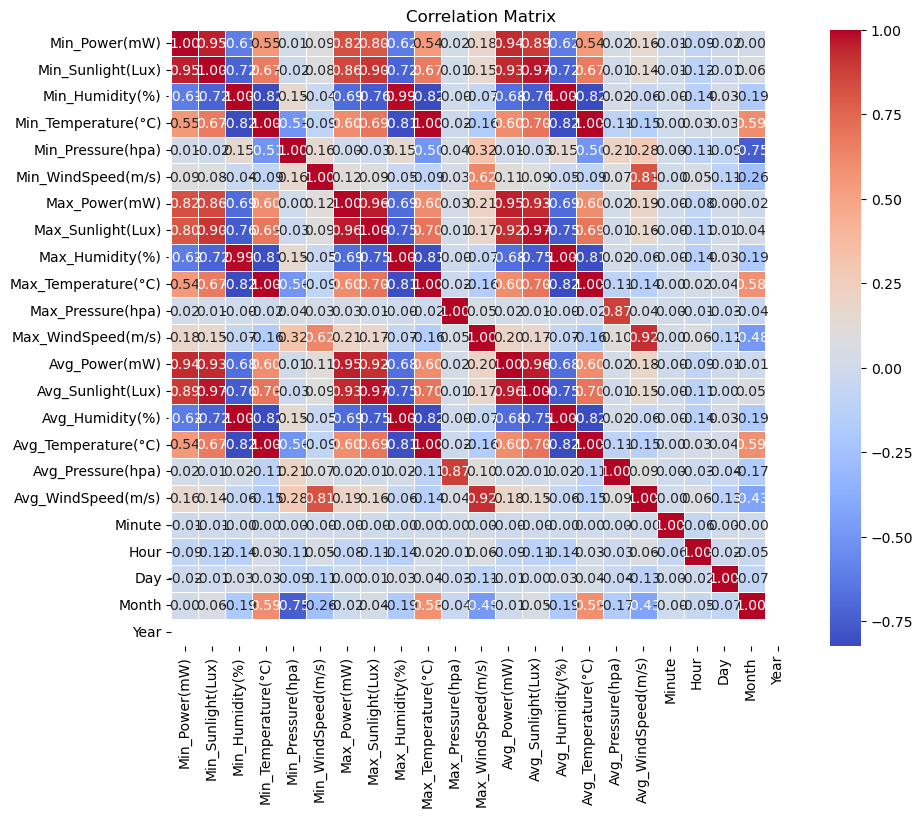

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = source_df.corr().iloc[::-1, ::-1]
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [107]:
to_predict_features = 'Avg_Power(mW)'

correlation_df = pd.DataFrame(correlation_matrix)
filtered_df = correlation_df[correlation_df[to_predict_features].abs() >= 0.50]

print(filtered_df[to_predict_features].sort_values(ascending=False))

selected_features = filtered_df[to_predict_features].sort_values(ascending=False).index.to_list()
selected_features

Avg_Power(mW)          1.000000
Avg_Sunlight(Lux)      0.960093
Max_Power(mW)          0.951531
Min_Power(mW)          0.935204
Min_Sunlight(Lux)      0.931281
Max_Sunlight(Lux)      0.921602
Max_Temperature(°C)    0.599966
Avg_Temperature(°C)    0.599511
Min_Temperature(°C)    0.597417
Min_Humidity(%)       -0.679066
Max_Humidity(%)       -0.679213
Avg_Humidity(%)       -0.680356
Name: Avg_Power(mW), dtype: float64


['Avg_Power(mW)',
 'Avg_Sunlight(Lux)',
 'Max_Power(mW)',
 'Min_Power(mW)',
 'Min_Sunlight(Lux)',
 'Max_Sunlight(Lux)',
 'Max_Temperature(°C)',
 'Avg_Temperature(°C)',
 'Min_Temperature(°C)',
 'Min_Humidity(%)',
 'Max_Humidity(%)',
 'Avg_Humidity(%)']

In [108]:
from sklearn.model_selection import train_test_split

X = source_df[selected_features]
y = pd.DataFrame(source_df[to_predict_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

y_train_log = np.log1p(y_train)
y_train_log

,Avg_Power(mW)
10428,7.205093
9201,7.207149
9100,6.846252
6992,5.942747
6894,3.844172
...,...
1672,4.837947
22,3.061052
1269,4.283035
2172,3.744078


In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = X_train.copy() 
X_train_scaled.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])

print(X_train_scaled)

       Avg_Power(mW)  Avg_Sunlight(Lux)  Max_Power(mW)  Min_Power(mW)  \
10428        1345.27           1.594516       1.822289       2.765628   
9201         1348.04           2.162485       1.818436       2.786150   
9100          939.35           1.223930       1.136060       1.708618   
6992          379.98           0.783124       0.231225       0.203312   
6894           45.72          -0.430208      -0.534163      -0.423896   
...              ...                ...            ...            ...   
1672          125.21          -0.027435      -0.322941      -0.244613   
22             20.35          -0.552284      -0.588130      -0.481605   
1269           71.46          -0.243149      -0.468545      -0.417468   
2172           41.27          -0.432234      -0.536090      -0.436927   
7335           49.41          -0.147465      -0.528527      -0.415094   

       Min_Sunlight(Lux)  Max_Sunlight(Lux)  Max_Temperature(°C)  \
10428           1.845944           1.337416            

In [110]:
X_test_scaled = X_test.copy() 
X_test_scaled.iloc[:, 1:] = scaler.fit_transform(X_test.iloc[:, 1:])

print(X_test_scaled)

      Avg_Power(mW)  Avg_Sunlight(Lux)  Max_Power(mW)  Min_Power(mW)  \
4612        1239.33           1.772721       2.437599       0.227103   
9369          46.59          -0.397955      -0.545758      -0.437754   
2647           0.01          -0.890552      -0.642047      -0.534729   
8130           3.08          -0.701527      -0.634795      -0.529924   
8624         185.12           0.191537       0.243944      -0.301364   
...             ...                ...            ...            ...   
6871          53.44          -0.401723      -0.537402      -0.405947   
5485         112.94          -0.163755      -0.397544      -0.328317   
2378          20.31          -0.574740      -0.594662      -0.499868   
301         1731.53           2.836668       2.515929       3.775721   
1              0.02          -0.886925      -0.642011      -0.534729   

      Min_Sunlight(Lux)  Max_Sunlight(Lux)  Max_Temperature(°C)  \
4612           0.669565           2.116605             1.517643   
9

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. 數據預處理

# 假設 X_train 和 X_test 已經準備好，並且是數值型數據
scaler = StandardScaler()

# # 假設 X_train 和 X_test 是 DataFrame
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.to_numpy()
X_test_scaled = X_test_scaled.to_numpy()


In [116]:
# 檢查數據的形狀
print(X_train_scaled.shape)  # 應該是 (樣本數量, 特徵數量)
print(X_test_scaled.shape)

# 2. 建立時間序列的滯後特徵
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data[i:i + n_steps]  # 用前 n_steps 筆的數據
        seq_y = data[i + n_steps]    # 預測下一個數據
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 10  # 用前十筆資料來做預測
X_train_seq, y_train_seq = create_sequences(X_train_scaled, n_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, n_steps)

# 檢查數據形狀
print(X_train_seq.shape)  # 應該是 (樣本數量, n_steps, 特徵數量)
print(X_test_seq.shape)

(8500, 12)
(2125, 12)
(8490, 10, 12)
(2115, 10, 12)


In [ ]:

# 3. 建立 LSTM 模型

model = Sequential()

# 第一層 LSTM 層
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))  # Dropout 來防止過擬合

# 第二層 LSTM 層
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))  # Dropout

# 輸出層 (回歸任務)
model.add(Dense(units=X_train_seq.shape[2]))

# 編譯模型
optimizer = Adam(learning_rate=0.001)  # 設置學習率
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 10, 100)           45200     
                                                                 
 dropout_12 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 12)                612       
                                                                 
Total params: 76,012
Trainable params: 76,012
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. 訓練模型

# 使用 EarlyStopping 回調來提前終止訓練
early_stopping = EarlyStopping(
    monitor='loss',  # 可以是 'val_loss' 或者 'loss'，取決於你是監控訓練集還是驗證集的損失
    patience=10,     # 若損失在10個epoch內不改善，則停止訓練
    restore_best_weights=True,  # 訓練停止後恢復模型的最佳權重
    verbose=1
)

# 使用 ReduceLROnPlateau 回調來自動調整學習率
lr_reducer = ReduceLROnPlateau(
    monitor='loss',  # 監控指標
    factor=0.5,      # 當監控指標停止改善時，將學習率縮小為原來的一半
    patience=5,      # 等待 5 個epoch後，若損失不改善，則減小學習率
    min_lr=0.0001,   # 最小學習率
    verbose=1
)

# 訓練模型
model.fit(
    X_train_seq, y_train_seq, 
    epochs=250, 
    batch_size=32, 
    verbose=1, 
    callbacks=[early_stopping, lr_reducer]  # 同時使用 EarlyStopping 和 ReduceLROnPlateau
)

# 5. 預測結果
y_pred = model.predict(X_test_seq)

# 6. 處理預測結果
y_pred = y_pred.round(2)  # 四捨五入
y_pred = np.clip(y_pred, 0, None)  # 負數改成0

# 7. 顯示結果
print("預測結果:", y_pred[:10])

Epoch 1/250
266/266 [==============================] - 12s 39ms/step - loss: 1.0007 - lr: 0.0010
Epoch 2/250
266/266 [==============================] - 10s 38ms/step - loss: 1.0001 - lr: 0.0010
Epoch 3/250
266/266 [==============================] - 10s 39ms/step - loss: 1.0001 - lr: 0.0010
Epoch 4/250
266/266 [==============================] - 10s 39ms/step - loss: 1.0000 - lr: 0.0010
Epoch 5/250
266/266 [==============================] - 10s 39ms/step - loss: 1.0000 - lr: 0.0010
Epoch 6/250
266/266 [==============================] - 11s 40ms/step - loss: 1.0001 - lr: 0.0010
Epoch 7/250
266/266 [==============================] - 10s 39ms/step - loss: 1.0000 - lr: 0.0010
Epoch 8/250
266/266 [==============================] - 10s 37ms/step - loss: 1.0000 - lr: 0.0010
Epoch 9/250
265/266 [============================>.] - ETA: 0s - loss: 0.9995
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
266/266 [==============================] - 10s 37ms/step - loss: 0.999

In [ ]:
#pd.DataFrame(y_pred, columns=X.columns)
y_pred_df = pd.DataFrame(y_pred.transpose()[0],columns=y_test.columns)
y_test_df = pd.DataFrame(y_test,columns=y_test.columns).reset_index(drop=True)
print("Prediction\n",y_pred_df)
print("Ture\n",y_test_df)

Prediction
       Avg_Power(mW)
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
...             ...
2110            0.0
2111            0.0
2112            0.0
2113            0.0
2114            0.0

[2115 rows x 1 columns]
Ture
       Avg_Power(mW)
0              0.23
1              1.55
2             89.51
3             66.63
4              3.69
...             ...
2120         179.82
2121           0.54
2122           0.06
2123           5.49
2124         606.40

[2125 rows x 1 columns]


In [ ]:
error = abs(y_test_df[to_predict_features] - y_pred_df[to_predict_features])
print(error.sum()) # 差距總和
error

582237.9900005717


0        0.23
1        1.55
2       89.51
3       66.63
4        3.69
        ...  
2120      NaN
2121      NaN
2122      NaN
2123      NaN
2124      NaN
Name: Avg_Power(mW), Length: 2125, dtype: float64